<a href="https://colab.research.google.com/github/juliakatsoulis/Portfolio/blob/main/optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization


## Here, I implemented a basic **gradient descent** algorithm to minimize the Rosenbrock function. The stop condition is $||x_{t+1} - x_t|| \leq 1e-6$. Additionally, the algorithm stops if the number of iterations exceeds `max_iter`. I used the following parameters:
- starting point: $(-1.2, 1.0)$,
- step size: 0.001,
- `tol = 1e-6`,
- `max_iter=1000`.


In [ ]:

import numpy as np

def rosenbrock(x,y):
  return (1-x)**2+100*(y-x**2)**2

def r_grad(x,y):
  df_dx = -2*(1-x)-400*x*(y-x**2)
  df_dy = 200*(y-x**2)
  return np.array([df_dx, df_dy])

def grad_descent(learning_rate = .001, tol = 1e-6, max_iter = 1000):
  x, y= (-1.2,1.0)
  point = np.array([x,y])
  trajectory = [point.copy()]

  for i in range(max_iter):
    grad = r_grad(point[0], point[1])
    new_point = point - learning_rate*grad

    trajectory.append(new_point.copy())

    if np.linalg.norm(new_point - point) <= tol:
      return i+1, new_point, rosenbrock(new_point[0], new_point[1]), np.array(trajectory)

    point = new_point

  return max_iter, point, rosenbrock(point[0], point[1]), np.array(trajectory)

iterations, final_point, final_value, trajectory = grad_descent()
print("number of iterations:", iterations)
print("final point", final_point)
print("final function value", final_value)

number of iterations: 1000
final point [0.32726277 0.1040128 ]
final function value 0.45352902482768304


### Using $(-1.2, 1.0)$ as the starting point, I generated a figure with 3 subplots arranged in a row. Each subplot showd the trajectory of the optimization process for the following configurations:

1. Gradient Descent with $\alpha=0.001$
2. Gradient Descent with $\alpha=0.002$
3. Gradient Descent with $\alpha=0.005$

In each subplot, I plotted the trajectory of the optimization process as well as the contour of the objective function. I marked the starting and end points.

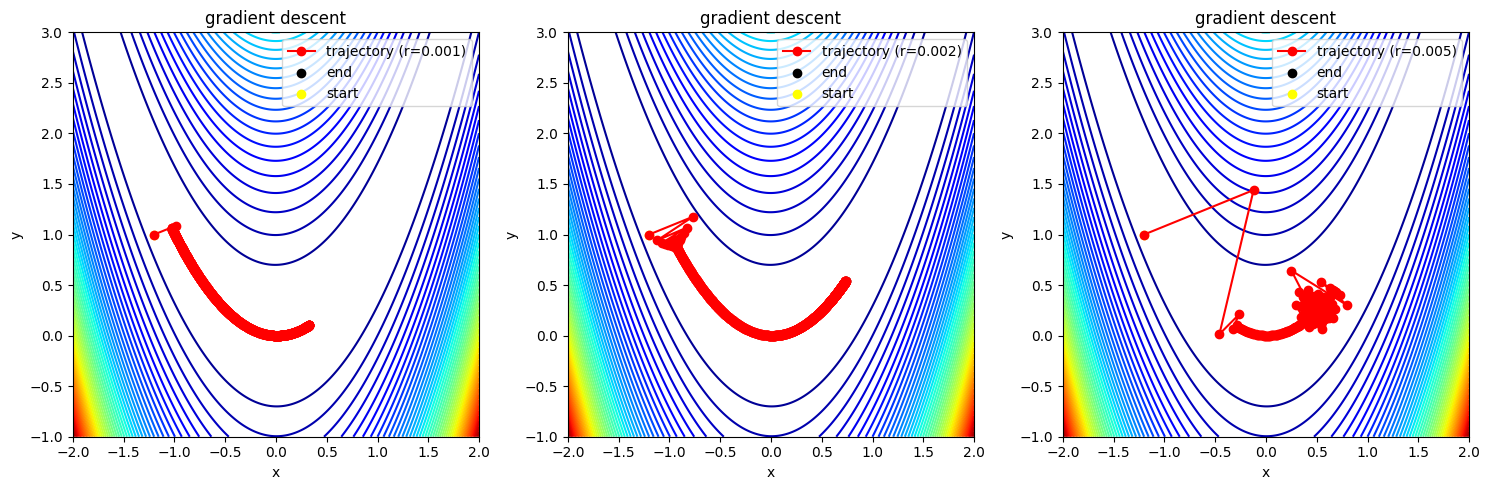

In [ ]:
import matplotlib.pyplot as plt

rates = [0.001, 0.002, 0.005]
fig, axes = plt.subplots(1, 3, figsize=(15,5))

x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

for i, rates in enumerate(rates):
  iterations, final_point, final_value, trajectory = grad_descent(learning_rate=rates)

  ax = axes[i]
  ax.contour(X, Y, Z, levels=50, cmap='jet')
  ax.plot(trajectory[:, 0], trajectory[:, 1], color='red', marker='o', label=f'trajectory (r={rates})')

  ax.scatter(final_point[0], final_point[1], color='black', marker='o', label='end')
  ax.scatter([-1.2], [1.0], color='yellow', marker='o', label='start')

  ax.set_title("gradient descent")
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.legend()

plt.tight_layout()
plt.show()

## K-Nearest Neighbors (KNN) from Scratch

### (a) (2 points) Using a breast cancer dataset, I split the dataset into training (80%) and testing (20%) sets. The last column, `target`, is the binary response variable that needs to be predicted (`malignant` vs. `benign`).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/breast_cancer.csv")

X = df.drop(columns=["target"]).values
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("training set size", X_train.shape[0])
print("testing set size", X_test.shape[0])

training set size 455
testing set size 114


### Then, I implement the Following Functions:
```
def euclidean_distance(x1, x2):
    """Computes the Euclidean distance between two points."""
    return distance

def predict(X_train, y_train, x_test, k):
    """Predicts the label for x_test based on k nearest neighbors from X_train."""
    return y_pred

def accuracy(y_true, y_pred):
    """Calculates the accuracy of the predictions."""
    return accuracy
```

In [ ]:
def euclidean_distance(x1, x2):
  """Computes the Euclidean distance between two points."""
  return np.sqrt(np.sum((x1-x2)**2))

def predict(X_train, y_train, X_test, k):
  """Predicts the label for X_test based on k neartest neighbors from X_train."""
  distances =[euclidean_distance(X_train, X_test) for X_train in X_train]
  k_idx = np.argsort(distances)[:k]
  k_nearest_neighbors = [y_train[i] for i in k_idx]
  return max(set(k_nearest_neighbors), key=k_nearest_neighbors.count)

def accuracy(y_true, y_pred):
  """Calculates the accuracy of the predictions."""
  return np.mean(y_true == y_pred)

### I then ran my KNN classifier on the test dataset. I reported the accuracy for different values of $k$ (e.g., $k=1, 5, 10, 30, 50)$.

accuracy for k=1: 0.9298245614035088
accuracy for k=5: 0.956140350877193
accuracy for k=10: 0.9649122807017544
accuracy for k=30: 0.9473684210526315
accuracy for k=50: 0.9473684210526315


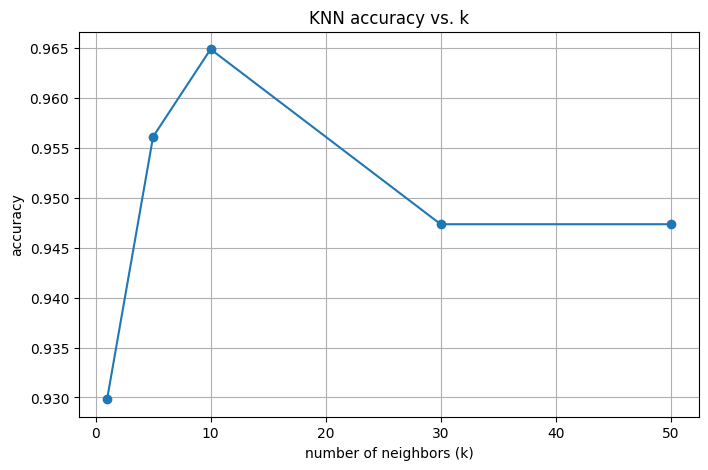

In [ ]:
k_val = [1,5, 10, 30, 50]
accuracies = []

for k in k_val:
  y_pred = np.array([predict(X_train, y_train, X_test, k) for X_test in X_test])
  acc = accuracy(y_test, y_pred)
  accuracies.append(acc)
  print(f"accuracy for k={k}: {acc}")

plt.figure(figsize=(8,5))
plt.plot(k_val, accuracies, marker="o", linestyle="-")
plt.xlabel("number of neighbors (k)")
plt.ylabel("accuracy")
plt.title("KNN accuracy vs. k")
plt.grid()
plt.show()

## Gradient Descent

Given training data $\{\mathbf{x}_i, y_i\}^n_{i=1}$, each $x_i\in \mathbb{R}^d$ and $y_i \in \{+1, -1\}$, I tried to solve the following logistic regression problem by gradient descent:
\begin{align}
\min_{\mathbf{w}\in R^d}\left\{\frac{1}{n}\sum_{i=1}^n\log(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i})+\frac{1}{2}\|\mathbf{w}\|^2_2  \right\} := f(\mathbf{w}).
\end{align}
Then, I tested the algorithm using a 'heart scale' dataset with $n = 270$ and $d = 13$: the matrix $\mathbf{X}$ is stored in the file 'X$\_$heart', and the vector $\mathbf{y}$ is stored in the file 'y$\_$heart'. ('X$\_$heart' contains $n$ lines, each line stores a vector $\mathbf{x}_i$ with $d$ real numbers. 'y$\_$heart' contains the $\mathbf{y}$ vector.)

In [ ]:
## Load data:
def load_data():
  path_X = "/content/drive/MyDrive/Colab Notebooks/X_heart"
  path_y = "/content/drive/MyDrive/Colab Notebooks/y_heart"

  X = np.loadtxt(path_X)
  y = np.loadtxt(path_y)

  return X, y

X, y = load_data()
print(X.shape)
print(Y.shape)

(270, 13)
(400, 400)


### Next, I derived the gradient of $f(\mathbf{w})$ w.r.t. $\mathbf{w}$.

In [ ]:
def logistic_loss(w, X, y):
  n = len(y)
  lin_term = y*(X@w)
  loss = np.log(1+np.exp(-lin_term)).mean()+0.5*np.linalg.norm(w)**2
  return loss

def logistic_grad(w, X, y):
  n = len(y)
  lin_term = y*(X@w)
  grad = -(X.T @ (y/(1+np.exp(lin_term))))/n+w
  return grad

def grad_descent(X, y, lr=0.02, tol=1e-6, max_iter=1000):
  d = X.shape[1]
  w = np.zeros(d)
  losses = []

  for i in range(max_iter):
    loss = logistic_loss(w, X, y)
    losses.append(loss)
    grad = logistic_grad(w, X, y)
    w -= lr*grad
  return w, losses

w_opt, losses = grad_descent(X, y, lr=0.1, max_iter=1000)
print("optimized weights:", w_opt)

optimized weights: [ 0.02991728  0.08993936  0.09458515  0.02492071  0.0182597   0.00059294
  0.06362198 -0.05930704  0.13886738  0.06782464  0.08062879  0.12084982
  0.18046084]


### Furthermore, I implemented the gradient descent algorithm with a fixed step size $\eta$. I found a small $\eta_1$ such that the algorithm converges and then increased the step size to $\eta_2$ so the algorithm cannot converge. I ran 50 iterations and plotted the iteration versus $\log(f(\mathbf{w}^k) -f(\mathbf{w}^*))$ plot for $\eta_1$ and $\eta_2$. I used the minimum value I computed as $f(\mathbf{w}^*)$ when I plotted the figure.

In [ ]:
ss1 = 0.5
ss2 = 2

w_opt1, losses1 = grad_descent(X, y, lr=ss1, max_iter=50)
w_opt2, losses2 = grad_descent(X, y, lr=ss2, max_iter=50)

f_w_st = min(min(losses1), min(losses2))

log_loss1 = np.log(np.array(losses1)-f_w_st + 1e-10)
log_loss2 = np.log(np.array(losses2)-f_w_st + 1e-10)

Plot of a small step size $\eta_1$:

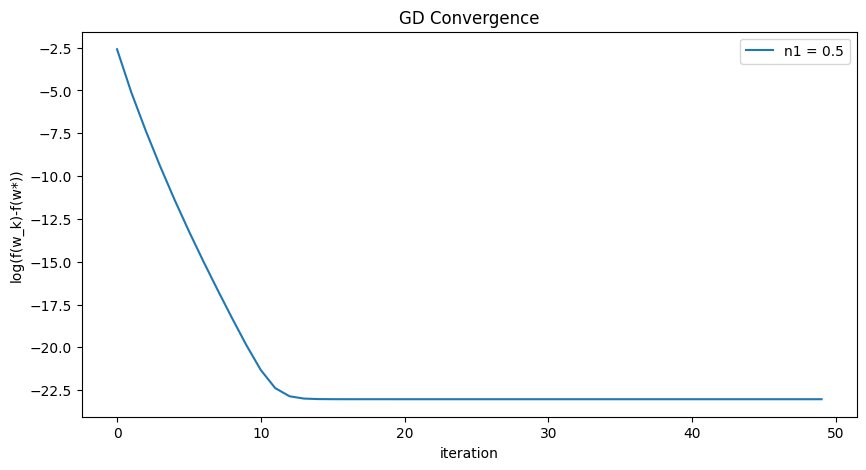

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(50), log_loss1, label=f"n1 = {ss1}")
plt.xlabel("iteration")
plt.ylabel("log(f(w_k)-f(w*))")
plt.title("GD Convergence")
plt.legend()
plt.show()

Plot of a small step size $\eta_2$:

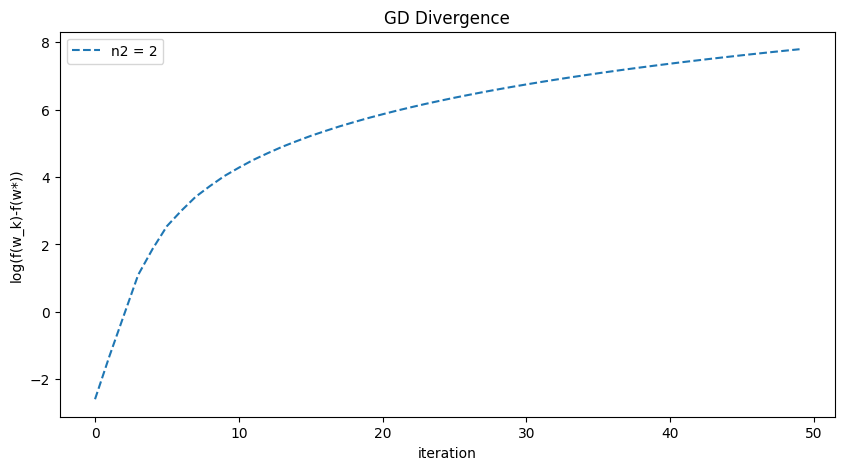

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(50), log_loss2, label=f"n2 = {ss2}", linestyle="dashed")
plt.xlabel("iteration")
plt.ylabel("log(f(w_k)-f(w*))")
plt.title("GD Divergence")
plt.legend()
plt.show()

The $f(\mathbf{x}^*)$ value used is:

In [ ]:
print(f"f(w*) value used in the plots: {f_w_st}")

f(w*) value used in the plots: 0.6185097460947857


### Moreover, I implemented the gradient descent algorithm with backtracking line search ($\sigma=0.01$). I plotted the same iteration versus $\log(f(\mathbf{w}^k) -f(\mathbf{w}^*))$ plot.

In [ ]:
def grad_descent_backtrack(X, y, sigma = 0.01, beta = 0.5, max_iter = 50, i_alpha=1.0):
  d = X.shape[1]
  w =np.zeros(d)
  losses = []

  for i in range(max_iter):
    loss = logistic_loss(w, X, y)
    losses.append(loss)
    grad = logistic_grad(w, X, y)
    alpha = i_alpha

    while logistic_loss(w-alpha*grad, X, y) > loss-sigma*alpha*np.linalg.norm(grad)**2:
      alpha *= beta

    w = w-alpha*grad

  return w, losses

In [ ]:
w_opt_bt, losses_bt = grad_descent_backtrack(X, y, sigma = 0.01, beta = 0.5, max_iter = 50, i_alpha=1.0)

f_w_st_bt = min(losses_bt)

log_loss_bt = np.log(np.array(losses_bt)-f_w_st_bt + 1e-10)

The Plot:

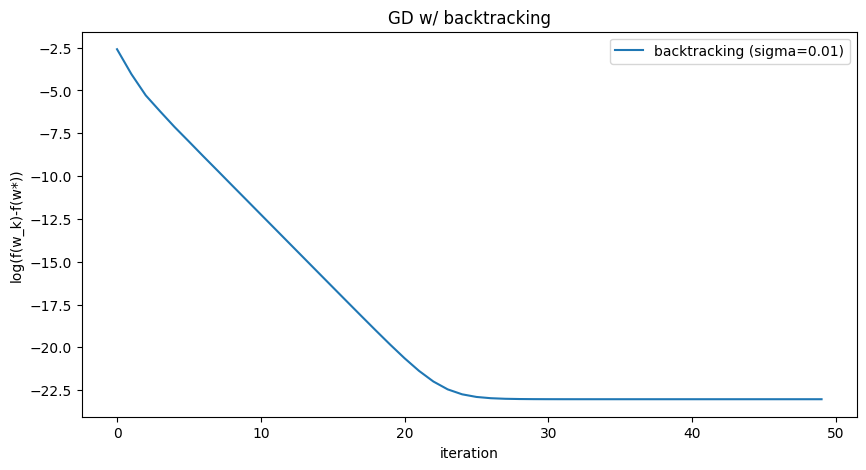

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(50), log_loss_bt, label="backtracking (sigma=0.01)")
plt.xlabel("iteration")
plt.ylabel("log(f(w_k)-f(w*))")
plt.title("GD w/ backtracking")
plt.legend()
plt.show()

### I tested my implementation (gradient descent with backtracking line search) on a larger dataset 'epsilonsubset'. I plotted the same iteration vs error plot.

In [ ]:
def load_data_e():
  path_X_e = "/content/drive/MyDrive/Colab Notebooks/x_epsilonsubset"
  path_y_e = "/content/drive/MyDrive/Colab Notebooks/y_epsilonsubset"

  X_e = np.loadtxt(path_X_e)
  y_e = np.loadtxt(path_y_e)

  return X_e, y_e

def logistic_loss(w, X_e, y_e):
  n = len(y_e)
  lin_term = y_e*(X_e@w)
  loss = np.log(1+np.exp(-lin_term)).mean()+0.5*np.linalg.norm(w)**2
  return loss

def logistic_grad(w, X_e, y_e):
  n = len(y_e)
  lin_term = y_e*(X_e@w)
  grad = -(X_e.T @ (y_e/(1+np.exp(lin_term))))/n+w
  return grad

def grad_descent_backtrack_e(X_e, y_e, sigma = 0.01, beta = 0.5, max_iter = 50, i_alpha=1.0):
  d = X_e.shape[1]
  w =np.zeros(d)
  losses = []

  for i in range(max_iter):
    loss = logistic_loss(w, X_e, y_e)
    losses.append(loss)
    grad = logistic_grad(w, X_e, y_e)
    alpha = i_alpha

    while logistic_loss(w-alpha*grad, X_e, y_e) > loss-sigma*alpha*np.linalg.norm(grad)**2:
      alpha *= beta

    w = w-alpha*grad

  return w, losses

In [ ]:
X_e, y_e = load_data_e()

w_opt_e, losses_e = grad_descent_backtrack_e(X_e, y_e, sigma = 0.01, beta = 0.5, max_iter = 50, i_alpha=1.0)

f_w_st_e = min(losses_e)

log_loss_e = np.log(np.array(losses_e)-f_w_st_e + 1e-10)

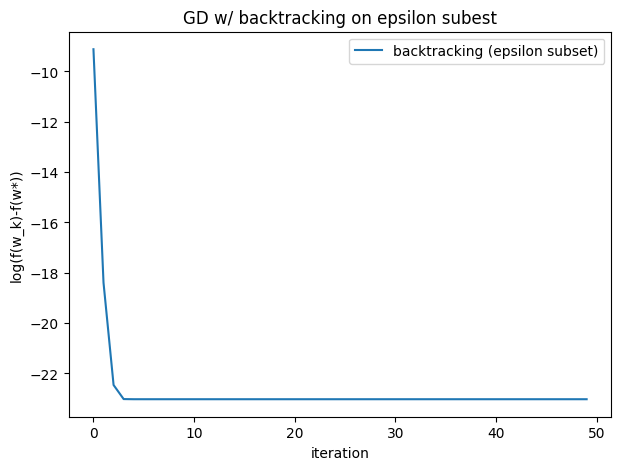

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(50), log_loss_e, label="backtracking (epsilon subset)")
plt.xlabel("iteration")
plt.ylabel("log(f(w_k)-f(w*))")
plt.title("GD w/ backtracking on epsilon subest")
plt.legend()
plt.show()